# DS-SF-23 | Lab 03 - Exploratory Data Analysis

## Setup

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'advertising-raw.csv'))

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We have 200 observations in this dataset.  Each observation records the budget used to run ads on TV, on radio, and in the newspapers (in thousands of dollars) as well as the sale figures (also in thousands of dollars).

In this lab, we are going to do some basic exploratory data analysis.

> ## Question 1.  Make some boxplots!  E.g., `df[ ['column(s) of interest'] ].plot(kind = 'box')`

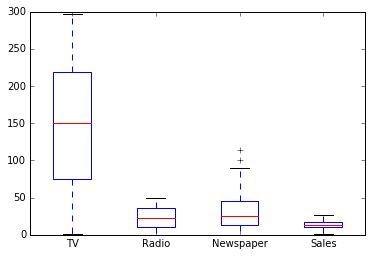

In [7]:
df.plot(kind = 'box')

> ## Question 2.  What do we learn from TV, radio, newspaper and sales boxplots?

Answer: Tv and Radio are symmetrically distributed with no outliers. Newspaper is roughly symmetric but seems to have two outliers. Sales doesn't have any outliers but seems to be Skewed to the right.

> ## Question 3.  Let's play with correlation!  Compute the correlation matrix of your data and explain what you've learned from it.  E.g., which variable can depict sales the best?  (TV, radio or newspaper)  What are the highest and lowest correlations?  What did you learn from the correlation matrix?

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Answer: TV can depict Sales the best with a 0.78 correlation. The highest correlation. TV has a low correlation with Radio and Newspaper.

## Let's get rid of outliers!

Directions

1. Look over your boxplots and pick one variable that likely has outliers.
2. Find the Interquartile Range (IQR) of that variable.  You can do this in two different ways.
  - Use `df.describe()`
  - Use `df.quantile()`
3. Remember, one definition for outliers is anything that is more than `1.5 * IQR` above Q3 or `1.5 * IQR` below Q1.  For this exercise, solely focus on `1.5 * IQR` above Q3)
4. Delete the rows for these outliers.

> ## Question 4.  Step 1:  Which variable seems to have outliers?

Answer:

In [11]:
# Hint: Start checking how many observations are in your DataFrame

len(df)

200

> ## Question 5.  Step 2: Compute the IQR

In [13]:
Q1 = df.Newspaper.quantile(.25)
Q3 = df.Newspaper.quantile(.75)

IQR = Q3 - Q1

IQR

32.350000000000001

> ## Question 6.  Steps 3 and 4: Remove the outliers

In [14]:
df.drop(df[df.Newspaper > Q3 + 1.5 * IQR].index, inplace = True)

In [15]:
# Sanity check: Check the length of your data and see if you have correctly dropped the outliers

len(df)

198

# Your last mission!

Our goal is to divide our dataset to high and low Sales.  We would like to add a binary variable called `SalesBinary` which is 0 if sales of that specific observation is below the median of all sales and 1 otherwise.

> ## Question 7.  We can do it in shorter steps - but for education purposes, first define a variable called `SalesCategory` which is `Low` when sales is below the median and `High` otherwise

In [18]:
mask = (df['Sales'] > df['Sales'].median())

df['SalesCategory'] = 'Low'
df.loc[mask, 'SalesCategory'] = 'High'

> ## Question 8.  We can now define a new variable called `SalesBinary` that serves our purpose.  Please use `.map()`.

In [25]:
# Get the documentation with `?map`

?map

In [22]:
df['SalesBinary'] = df.SalesCategory.map({'Low' : 0, 'High' : 1})

In [24]:
df.head()

,TV,Radio,Newspaper,Sales,SalesCategory,SalesBinary
0,230.1,37.8,69.2,22.1,High,1
1,44.5,39.3,45.1,10.4,Low,0
2,17.2,45.9,69.3,9.3,Low,0
3,151.5,41.3,58.5,18.5,High,1
4,180.8,10.8,58.4,12.9,Low,0
